In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.io import loadmat, savemat
import io
import sklearn
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mode_inference import mode_inference
from tsne_inference import tsne_inference
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
cifar_train_mode = loadmat("../data/cifar_train_mode.mat")["X_2d"]

In [3]:
cifar_train_mat = loadmat("../Experiments_MATLAB/data/cifar_train.mat")

In [6]:
cifar_train = cifar_train_mat["StockData"]
cifar_train_target = cifar_train_mat["labels"]

In [7]:
indices = np.array([])
for i in range(10):
    inds = np.random.choice(np.where(np.array(cifar_train_target) == i)[0], size=10)
    indices = np.concatenate((indices, inds))

In [8]:
indices = np.array(indices, dtype=int)

In [9]:
# _, cifar_mode_sample, _, cifar_sample_target = train_test_split(cifar_train_mode, cifar_train_target, test_size=50,
#                                                                random_state=10)
# _, cifar_sample, _, _ = train_test_split(cifar_train, cifar_train_target, test_size=50, random_state=10)
cifar_mode_sample = cifar_train_mode[indices]
cifar_sample_target = np.array(cifar_train_target)[indices]
cifar_sample = cifar_train[indices]

In [10]:
np.unique(cifar_sample_target, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]))

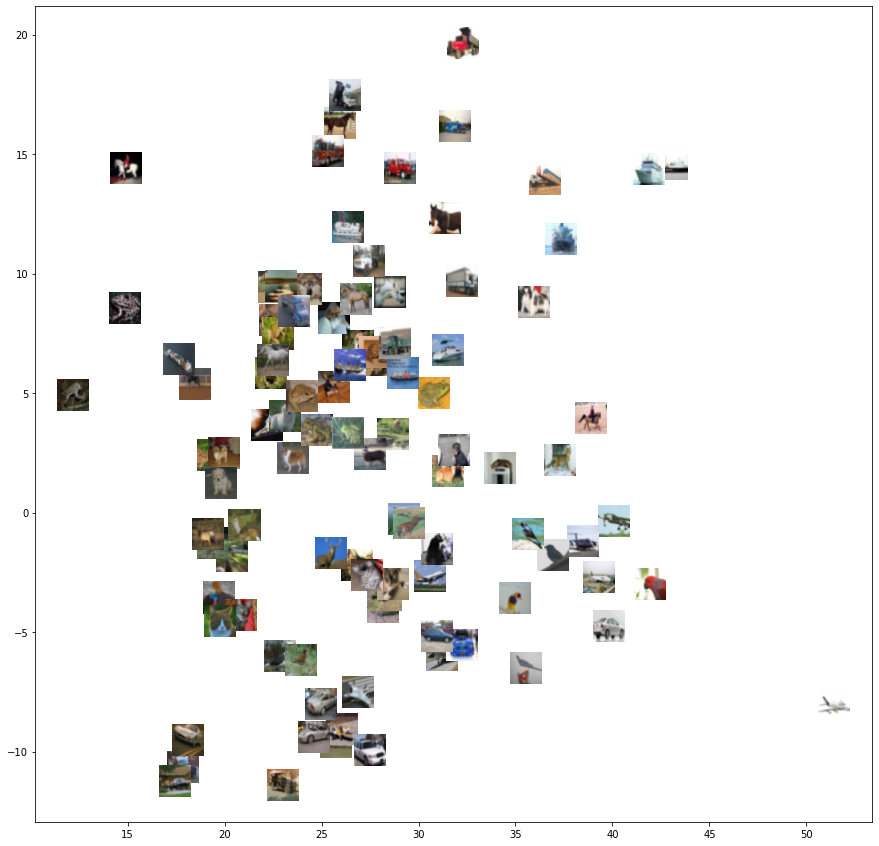

In [15]:
##### import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def main():
    x = cifar_mode_sample[:, 0]
    y = cifar_mode_sample[:, 1]
    images =  cifar_sample   #get_sample_data('ada.png')
    fig, ax = plt.subplots(figsize=(15,15))
    imscatter(x, y, images, zoom=1.0, ax=ax)
#     ax.scatter(x, y)
    plt.savefig("../figures/cifar_overlay_mode")
    plt.show()

def imscatter(x, y, images, ax=None, zoom=2):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(images)
    except TypeError:
        # Likely already an array...
        pass
#     im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, img in zip(x, y, images):
        R = img[0:1024].reshape(32,32)
        G = img[1024:2048].reshape(32,32)
        B = img[2048:].reshape(32,32)
        im = OffsetImage(np.dstack((R,G,B)), zoom=zoom, interpolation='bicubic')
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

main()